# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

---
---

### 41.1 Loading and viewing the data

There are four files in the `/data` directory related to Baptist Health:
* bhmclr_cpt.xlsx
* bhmclr_drg.xlsx
* bhmclr_med.xlsx
* bhmclr_proc.xlsx

All of these files have the same format, so you can load and process them all the same way, but the subsets of data in each are distinct.

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/data/bhmclr_drg.xlsx', sheet_name='Sheet1', skiprows=3)

In [2]:
data.shape

(3864, 19)

In [3]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [4]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf9fe48e48>,
      dtype=object)

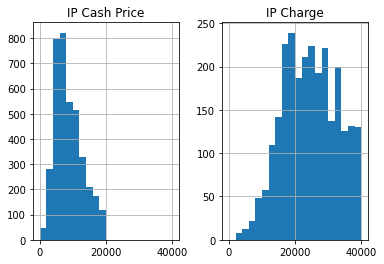

In [5]:
data[['IP Cash Price','IP Charge']].hist(bins=20, range=[0,40000])

In [6]:
high_cost_filter = data['IP Charge'] > 300000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
2555,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ARKANSAS TOTAL CARE [40700],490685.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

The histograms above shows that the ranges for in patient cash prices and charges vary quite a bit. Cash price is generally not going over 200000 whereas the charge goes all the way up to 400000. The concentration of data for IP cash price is also much greater within that smaller range of prices as compared to the IP charges. The surgeries seem to show a much higher charges for the procedures with complication in the surgery, particulary with multiple co-morbidities.

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

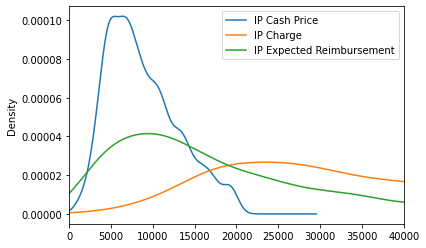

In [7]:
graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance

The Cash Price, which would show individual patients' payment without insurance is really dense a little bit over $5000. This graph has a higher density than the others, but tapers off just before $30000.

* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company

The IP Charge graph shows that most of the charges the hospital bills insurance for is around $10000. Past this point, the charges do continue but at a lower density, so not as much of the charges are at this higher amount.

* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

The IP Expected Reimbursement has a density peak much further down than the other two graphs, around $23000. This amount also continues, similar to the IP Charge graph.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [8]:
data['Payer'].value_counts()

ARKANSAS TOTAL CARE [40700]          650
ALLWELL [15100]                      650
HEALTHSCOPE [95700]                  641
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [9]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        AxesSubplot(0.125,0.125;0.775x0.755)
ALLWELL [15100]                      AxesSubplot(0.125,0.125;0.775x0.755)
AR BLUE CROSS BLUE SHIELD [25001]    AxesSubplot(0.125,0.125;0.775x0.755)
ARKANSAS TOTAL CARE [40700]          AxesSubplot(0.125,0.125;0.775x0.755)
HEALTHSCOPE [95700]                  AxesSubplot(0.125,0.125;0.775x0.755)
MULTIPLAN                            AxesSubplot(0.125,0.125;0.775x0.755)
Name: IP Expected Reimbursement, dtype: object

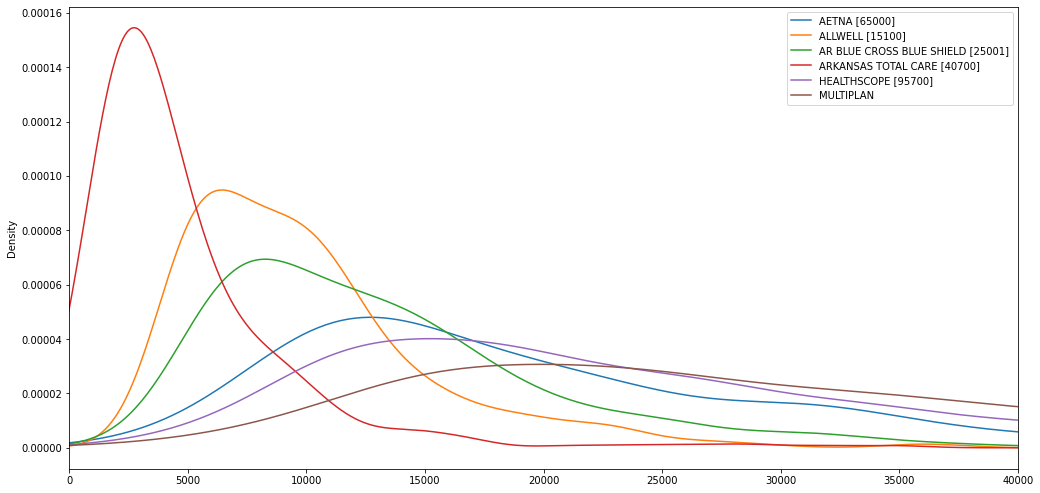

In [10]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)

### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?

The patterns of reimbursement amounts for all the plans shown above indicate that the highest density of reimbursement plans is in the lower amounts, with fewer and fewer amounts of reimbursements from higher amounts. This is why each curve has its peak relatively close to the left, and then slowly curves downwards and eases off below a density level of 0.00003.

* What does that tell you about these particular plans?

When looking at the plans specifically, we can see that Arkansas Total Care has significantly lower reimbursements indicated, as given by the high density all below $10000. Next, we have Allwell, AR Blue Cross Blue Shiled, Aetna, Helathscope, then Multiplan when looking at "cheapest" reimbursements compared to density, indicated by the curves' peaks.


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

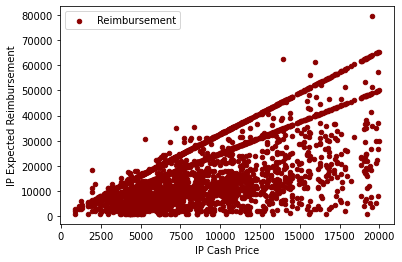

In [11]:
data.plot.scatter(x='IP Cash Price', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

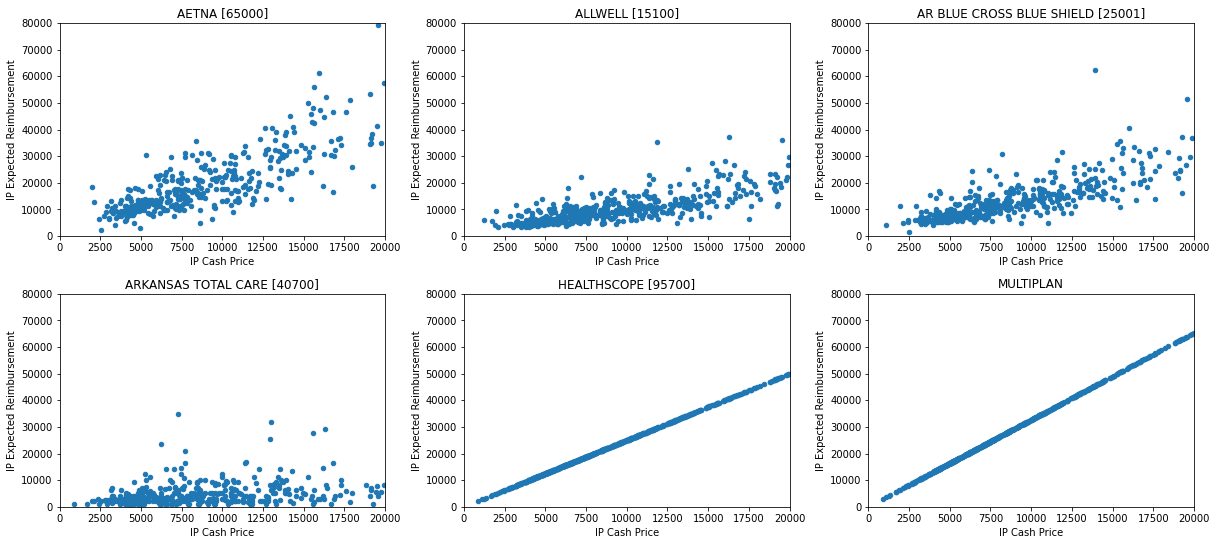

In [12]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [13]:
# Your code here to load data...
flu_data = pd.read_csv('/data/flu_2016_2017.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf8d4985c0>,
      dtype=object)

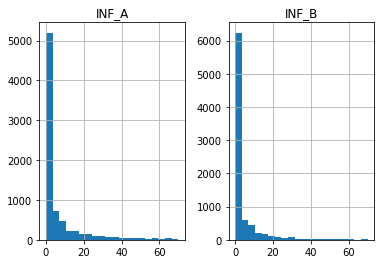

In [14]:
# Your code here to do a first visualization...
flu_data[['INF_A','INF_B']].hist(bins=20, range=[0,70])

### Observations #1

_This histogram takes into account all the data we have about the incidence of the flu around the world from 2016-2017. The data shown in the histograms shows us a good comparison for Influenza strains between A and B. While the data is very similar, it appears that there was a greater incidence of the A strain than the B straing across the world during this time frame._

In [15]:
# More code here to do a second visualization...
flu_data['FLUREGION'].value_counts()

South West Europe                983
Central America and Caribbean    932
Eastern Europe                   737
Northern Europe                  716
Western Asia                     639
Southern Asia                    628
Eastern Africa                   626
Western Africa                   607
Tropical South America           552
South-East Asia                  548
Oceania Melanesia Polynesia      304
Eastern Asia                     294
Temperate South America          280
Northern Africa                  236
Central Asia                     203
Middle Africa                    195
North America                    148
Southern Africa                   73
Name: FLUREGION, dtype: int64

In [16]:
flu_data.groupby(['FLUREGION'])['ALL_INF'].count()

FLUREGION
Central America and Caribbean    932
Central Asia                     203
Eastern Africa                   626
Eastern Asia                     294
Eastern Europe                   737
Middle Africa                    195
North America                    148
Northern Africa                  236
Northern Europe                  716
Oceania Melanesia Polynesia      304
South West Europe                983
South-East Asia                  548
Southern Africa                   73
Southern Asia                    628
Temperate South America          280
Tropical South America           552
Western Africa                   607
Western Asia                     639
Name: ALL_INF, dtype: int64

FLUREGION
Central America and Caribbean    AxesSubplot(0.125,0.125;0.775x0.755)
Central Asia                     AxesSubplot(0.125,0.125;0.775x0.755)
Eastern Africa                   AxesSubplot(0.125,0.125;0.775x0.755)
Eastern Asia                     AxesSubplot(0.125,0.125;0.775x0.755)
Eastern Europe                   AxesSubplot(0.125,0.125;0.775x0.755)
Middle Africa                    AxesSubplot(0.125,0.125;0.775x0.755)
North America                    AxesSubplot(0.125,0.125;0.775x0.755)
Northern Africa                  AxesSubplot(0.125,0.125;0.775x0.755)
Northern Europe                  AxesSubplot(0.125,0.125;0.775x0.755)
Oceania Melanesia Polynesia      AxesSubplot(0.125,0.125;0.775x0.755)
South West Europe                AxesSubplot(0.125,0.125;0.775x0.755)
South-East Asia                  AxesSubplot(0.125,0.125;0.775x0.755)
Southern Africa                  AxesSubplot(0.125,0.125;0.775x0.755)
Southern Asia                    AxesSubplot(0.125,0.125;0.775x0.755)
Temperate 

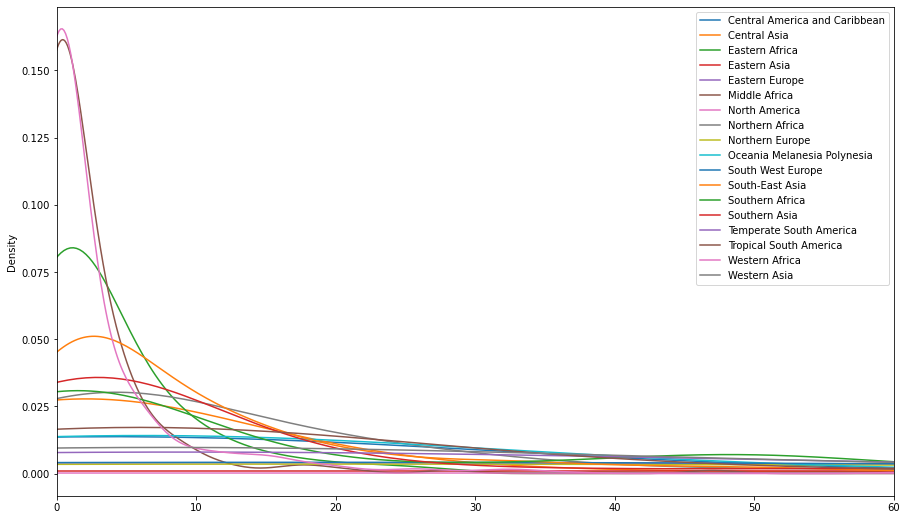

In [17]:
flu_data.groupby(['FLUREGION'])['ALL_INF'].plot.kde(
    xlim=(0,60),
    legend=True,
    figsize=(15,9))

### Observations #2

_This KDE shows the density of all influenza cases that are grouped by their regions, as indicated by the color-coded legend. The density plot shows the amounts of cases per region relative to each other and can be compared by looking at the peaks. While the totals are not shown here, the density does proporitionally show the amounts of cases. However, due to the higher amount of regions, the colors have some overlap and are difficult to distinguish as well._

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [18]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [19]:
%%bash
git pull
git add week09_assignment_2.ipynb
git commit -a -m "Submitting the week 9 programming assignment"
git push

Updating bc4c2c3..ab8fd9f
Fast-forward
 week05/feedback.md         | 5 +++++
 week06/feedback.md         | 3 +++
 week07-midterm/feedback.md | 3 +++
 3 files changed, 11 insertions(+)
 create mode 100644 week05/feedback.md
 create mode 100644 week06/feedback.md
 create mode 100644 week07-midterm/feedback.md
[main f578c43] Submitting the week 9 programming assignment
 2 files changed, 1074 insertions(+), 2 deletions(-)
 create mode 100644 week09/week09_assignment_2.ipynb


From github.com:shreyadash/hds5210-2021
   bc4c2c3..ab8fd9f  main       -> origin/main
To github.com:shreyadash/hds5210-2021.git
   ab8fd9f..f578c43  main -> main



---

If the message above says something like _Submitting the week 8 programming assignment_ or _Everything is up to date_, then your work was submitted correctly.